### Load the data set 

In [37]:
import pandas as pd 

# Read data set 
data = pd.read_csv("parkinsons_updrs1.csv")

# Check shape
data.shape

(5875, 21)

In [38]:
data.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


### Check our Y Variable - Medv: Median value of owner-occupied homes in 1000 dollars

In [45]:
 X = pd.DataFrame(data.iloc[:,:-1])
 y = pd.DataFrame(data.iloc[:,-1]) 

In [47]:
X.head(n=5)

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [46]:
y.head(n=5)

,total_UPDRS
0,34.398
1,34.894
2,35.389
3,35.810
4,36.375


In [48]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [49]:
print("X Train shape ", X_train.shape)
print("X Test shape  ", X_test.shape)
print("y Train shape ", y_train.shape)
print("y Test shape  ", y_test.shape)

X Train shape  (4700, 20)
X Test shape   (1175, 20)
y Train shape  (4700, 1)
y Test shape   (1175, 1)


In [50]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
regressor.coef_

array([[ 2.59850387e-01,  3.08180940e-01, -4.91211459e+00,
         1.45331003e-02, -3.85496783e+02, -4.35705734e+04,
        -6.61506465e+04, -1.23786355e+02,  2.24947274e+04,
         3.78373564e+01, -7.95240976e-01,  7.86346169e+03,
         2.07732319e+01,  1.40170157e+01, -2.67528530e+03,
        -2.27121970e+01, -4.88597506e-01,  1.11640607e+00,
        -3.57353024e+01,  1.54085292e+01]])

In [52]:
v = pd.DataFrame(regressor.coef_, index = ["Co-efficient"]).transpose()
w = pd.DataFrame(X.columns,columns = ['Attribute'])

In [53]:
coeff_df = pd.concat([w,v], axis = 1, join = 'inner')
coeff_df

,Attribute,Co-efficient
0,subject#,0.259850
1,age,0.308181
2,sex,-4.912115
3,test_time,0.014533
4,Jitter(%),-385.496783
5,Jitter(Abs),-43570.573402
6,Jitter:RAP,-66150.646550
7,Jitter:PPQ5,-123.786355
8,Jitter:DDP,22494.727442
9,Shimmer,37.837356


In [54]:
y_test.head(n=10)

,total_UPDRS
2667,26.230
2560,26.230
2098,20.867
642,44.503
552,15.264
1777,31.936
1081,24.702
1501,21.323
5707,42.401
2353,36.022


In [55]:
y_pred  = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred.head(n=10)

,Predicted
0,26.238423
1,30.314382
2,27.167150
3,29.374134
4,30.590497
5,27.541697
6,24.147979
7,26.136897
8,32.442921
9,23.496818


In [56]:
from sklearn import metrics 
import numpy as np
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared  Error", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R Squared", metrics.r2_score(y_test,y_pred))

Mean Absolute Error 7.759655268485181
Mean Squared Error 89.27805504319426
Root Mean Squared  Error 9.448706527519747
R Squared 0.2610396973037986


In [57]:
import statsmodels.api as sm

In [58]:
ols_model = sm.OLS(y_train,X_train)
ols_results = ols_model.fit()

In [59]:
print(ols_results.summary())

                                 OLS Regression Results                                
Dep. Variable:            total_UPDRS   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              2340.
Date:                Sun, 09 Apr 2023   Prob (F-statistic):                        0.00
Time:                        22:43:04   Log-Likelihood:                         -17155.
No. Observations:                4700   AIC:                                  3.435e+04
Df Residuals:                    4680   BIC:                                  3.448e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Mean Squared Error: 108.15865925401134
Intercept: 25.059712773645497
Coefficient: 18.252010431845584


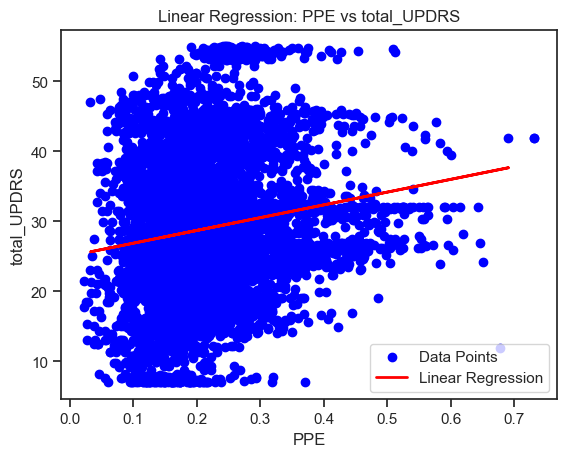

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data into a pandas DataFrame
data = pd.read_csv('parkinsons_updrs.csv')  # replace 'your_data.csv' with the actual filename of your data

# Extract the predictor (PPE) and target variable (total_UPDRS)
X = data['PPE'].values.reshape(-1, 1)
y = data['total_UPDRS'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) as a measure of model performance
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Print the coefficients of the linear regression model
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])

# Plot the data points and the linear regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('PPE')
plt.ylabel('total_UPDRS')
plt.title('Linear Regression: PPE vs total_UPDRS')
plt.legend()
plt.show()